Installation of xgboost, download of nltk packages and imports

In [1]:
!pip install xgboost==1.6.0

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay


from xgboost import XGBClassifier

import pandas as pd

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training data exploration, looking at consesus between annotators

In [2]:
train = pd.read_csv('PA3_train.tsv',sep='\t',names = ['Label','Review'])

print('Analysis of consensus between annotators')
print(train['Label'].value_counts())

print('Annotators agree: "1/1" and "0/0"')
mask1 = (train['Label'] == '1/1') | (train['Label'] == '0/0')

print(train[mask1].count())


print('Annotators disagree: "0/1" and "1/0"')
mask2 = (train['Label'] == '0/1') | (train['Label'] == '1/0')
print(train[mask2].count())

print('Second annotater can not tell:  "-1/1" and "-1/0"')
mask3 = (train['Label'] == '-1/1') | (train['Label'] == '-1/0')
print(train[mask3].count())

print('Others combinations')
print(train[(~mask1 & ~mask2 & ~mask3)].count())

Analysis of consensus between annotators
1/1     3496
0/0     3126
1/0      148
0/1      117
-1/0      97
-1/1      28
2/1        2
2/0        2
1/         1
9/1        1
Name: Label, dtype: int64
Annotators agree: "1/1" and "0/0"
Label     6622
Review    6622
dtype: int64
Annotators disagree: "0/1" and "1/0"
Label     265
Review    265
dtype: int64
Second annotater can not tell:  "-1/1" and "-1/0"
Label     125
Review    125
dtype: int64
Others combinations
Label     6
Review    6
dtype: int64


Preprocessing of data:
Use only data where annotators agree
Convert class labels from strings to integer
Test lemmetazation
Test stop word removal



In [3]:

mask1 = (train['Label'] == '1/1') | (train['Label'] == '0/0')
train = train[mask1]

def string_label_to_int(x):
    return int(x[0])
train['Label'] = train['Label'].apply(string_label_to_int)

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])
train['ReviewLemmatized'] = train['Review'].apply(lemmatize_text)


stop_words = set(stopwords.words('english'))

def stop_word_removal(text):
    return ' '.join([w for w in w_tokenizer.tokenize(text) if not w.lower() in stop_words])

train['ReviewStopWordsRemoved'] = train['Review'].apply(stop_word_removal)






Search for best preprocessing and feature extraction, 
Try lemmetezation and/or stop word removal

Try countvectorizer with tf-idf vectorizer
Try different length of n-grams


In [4]:
for ngram_length in [1,2,3,4]:

    print('Ngram length:')
    print(ngram_length)

    pipeline_CountVect = make_pipeline(
        CountVectorizer(ngram_range=(1,ngram_length)),
        Perceptron()
    )

    pipeline_TFIDF = make_pipeline(
        TfidfVectorizer(ngram_range=(1,ngram_length)),
        Perceptron()
    )


    print('Ordinary CV-accuracy, CountVectorizer/TFIDF')
    print(cross_val_score(pipeline_CountVect, train['Review'], train['Label']).mean())
    print(cross_val_score(pipeline_TFIDF, train['Review'], train['Label']).mean())


    print('Lemmatized, CV-accuracy, CountVectorizer/TFIDF')
    print(cross_val_score(pipeline_CountVect, train['ReviewLemmatized'], train['Label']).mean())
    print(cross_val_score(pipeline_TFIDF, train['ReviewLemmatized'], train['Label']).mean())
    


    print('Stop words removed CV-accuracy, CountVectorizer/TFIDF')
    print(cross_val_score(pipeline_CountVect, train['ReviewStopWordsRemoved'], train['Label']).mean())
    print(cross_val_score(pipeline_TFIDF, train['ReviewStopWordsRemoved'], train['Label']).mean())


Ngram length:
1
Ordinary CV-accuracy, CountVectorizer/TFIDF
0.9522804537422334
0.9497121358946587
Lemmatized, CV-accuracy, CountVectorizer/TFIDF
0.9509204811035741
0.9503167075186685
Stop words removed CV-accuracy, CountVectorizer/TFIDF
0.937784643447529
0.9323468049934448
Ngram length:
2
Ordinary CV-accuracy, CountVectorizer/TFIDF
0.9545451747135608
0.9556024625206634
Lemmatized, CV-accuracy, CountVectorizer/TFIDF
0.9566595223165935
0.9583203556974291
Stop words removed CV-accuracy, CountVectorizer/TFIDF
0.937783503391666
0.9337049535427235
Ngram length:
3
Ordinary CV-accuracy, CountVectorizer/TFIDF
0.9525824545402723
0.9554522031579546
Lemmatized, CV-accuracy, CountVectorizer/TFIDF
0.9533368295046458
0.953034942712193
Stop words removed CV-accuracy, CountVectorizer/TFIDF
0.9359721826369493
0.9380848201561877
Ngram length:
4
Ordinary CV-accuracy, CountVectorizer/TFIDF
0.9554512911132645
0.955905033346634
Lemmatized, CV-accuracy, CountVectorizer/TFIDF
0.9527328279085676
0.9530355127401

Best combination found was lemmetized text with TF_IDF vectorization, and words and bigrams (ngrams_range of (1,2))

Choice of model and parameter tuning:

Using the best found preprocessing and feature extraction...

In [ ]:


'''SVC parameter tuning'''

pipelineSVC = make_pipeline(
TfidfVectorizer(ngram_range=(1,2)),
SVC()
)

param_grid = {
    'svc__C': [1, 2, 3]
}
grid_search = GridSearchCV(estimator = pipelineSVC, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 1, return_train_score=True)
grid_search.fit(train['ReviewLemmatized'], train['Label'])

print('Best found SCV')
print(grid_search.best_params_)
print(grid_search.best_score_)



'''Random Forest tuning'''


pipelineRF = make_pipeline(
TfidfVectorizer(ngram_range=(1,2)),
RandomForestClassifier()
)

param_grid = {
    'randomforestclassifier__max_depth': [100,200,None]
}
grid_search = GridSearchCV(estimator = pipelineRF, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 1, return_train_score=True)
grid_search.fit(train['ReviewLemmatized'], train['Label'])

print('Best found RF')
print(grid_search.best_params_)
print(grid_search.best_score_)




'''Naive bayes'''
#No parameters to tune
'''
pipelineNB = make_pipeline(
TfidfVectorizer(ngram_range=(1,2)),
GaussianNB()
)

print(cross_val_score(pipelineNB, train['ReviewLemmatized'], train['Label']).mean())
'''

'''Neural Network'''
#Not tuned due to time constraint

pipelineNN = make_pipeline(
TfidfVectorizer(ngram_range=(1,2)),
MLPClassifier(verbose=True)
)

print(cross_val_score(pipelineNN, train['ReviewLemmatized'], train['Label']).mean())




Fitting 3 folds for each of 3 candidates, totalling 9 fits


Final test set evaluation

Iteration 1, loss = 0.61555998
Iteration 2, loss = 0.33648256
Iteration 3, loss = 0.16079308
Iteration 4, loss = 0.08325679
Iteration 5, loss = 0.04940261
Iteration 6, loss = 0.03235062
Iteration 7, loss = 0.02287243
Iteration 8, loss = 0.01721248
Iteration 9, loss = 0.01359002
Iteration 10, loss = 0.01113238
Iteration 11, loss = 0.00936956
Iteration 12, loss = 0.00808709
Iteration 13, loss = 0.00711497
Iteration 14, loss = 0.00637709
Iteration 15, loss = 0.00579137
Iteration 16, loss = 0.00531746
Iteration 17, loss = 0.00492383
Iteration 18, loss = 0.00460280
Iteration 19, loss = 0.00433887
Iteration 20, loss = 0.00411398
Iteration 21, loss = 0.00392269
Iteration 22, loss = 0.00375547
Iteration 23, loss = 0.00360611
Iteration 24, loss = 0.00347715
Iteration 25, loss = 0.00336324
Iteration 26, loss = 0.00326101
Iteration 27, loss = 0.00316892
Iteration 28, loss = 0.00308490
Iteration 29, loss = 0.00300846
Iteration 30, loss = 0.00293802
Iteration 31, loss = 0.00287365
Iteration 32, los

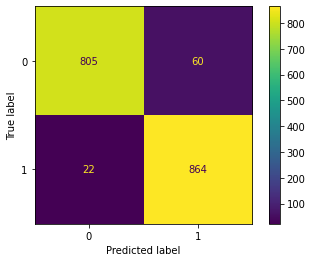

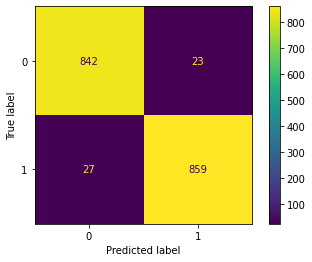

In [ ]:

baseline_pipeline = make_pipeline(
CountVectorizer(),
Perceptron()
)

baseline_pipeline.fit(train['Review'],train['Label'])

final_model_pipeline = make_pipeline(
TfidfVectorizer(ngram_range=(1,2)),
MLPClassifier(verbose=True)
)

final_model_pipeline.fit(train['ReviewLemmatized'],train['Label'])



test = pd.read_csv('PA3_test_clean.tsv',sep='\t',names = ['Label','Review'])
test['ReviewLemmatized'] = test['Review'].apply(lemmatize_text)


y_baseline_pred = baseline_pipeline.predict(test['Review'])
y_pred = final_model_pipeline.predict(test['ReviewLemmatized'])
y_true = test['Label']


print('Baseline Accuracy and conf matrix:')
print(accuracy_score(y_true, y_baseline_pred))
print(confusion_matrix(y_true, y_baseline_pred))

ConfusionMatrixDisplay.from_predictions(y_true, y_baseline_pred)

print('Final model accuracy and conf matrix')
print(confusion_matrix(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)


#Get some that went wrong:
for review, label, baselinePred, finalPred in zip(test['Review'],y_true,y_baseline_pred,y_pred):


    if (label == 1 and baselinePred == 0 and finalPred == 0):
        print('Review postive both thought negative')
        print(review)


    if (label == 0 and baselinePred == 1 and finalPred == 1):
        print('Review negative both thought positve')
        print(review)

    if (label == 0 and baselinePred == 1 and finalPred == 0):
        print('Review negative predicted by final not baseline')
        print(review)

    if (label == 1 and baselinePred == 0 and finalPred == 1):
        print('Review postive predicted by final not baseline')
        print(review)

    


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c62e8c4e-c29d-44f2-820c-55f4529719ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>